In [75]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [76]:
#Reading dataset
data=pd.read_csv(r"C:\Users\Smitha.s1_oob\OneDrive - GEMS Education\Documents\PERSONAL\DS\IoT new1.csv")
data.head()

,Fwd_IAT_Max,Bwd_IAT_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Active_Max,Idle_Max,Label,Cat
0,0,0,0,1921.000000,982.0,1430.000000,1,982,1,1430,0,75,Anomaly,Mirai
1,0,5310,0,0.000000,0.0,0.000000,1,0,2,0,0,4254,Anomaly,DoS
2,0,71,0,1398.000000,0.0,935.333333,0,0,3,2806,0,71,Anomaly,Scan
3,0,151,0,2082.000000,0.0,1388.000000,0,0,2,2776,0,151,Anomaly,Mirai
4,76,0,0,575.333333,443.0,420.000000,2,886,1,420,0,77,Anomaly,Mirai


In [77]:
#Basic Details collection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 14 columns):
Fwd_IAT_Max         2999 non-null int64
Bwd_IAT_Max         2999 non-null int64
PSH_Flag_Cnt        2999 non-null int64
Pkt_Size_Avg        2999 non-null float64
Fwd_Seg_Size_Avg    2999 non-null float64
Bwd_Seg_Size_Avg    2999 non-null float64
Subflow_Fwd_Pkts    2999 non-null int64
Subflow_Fwd_Byts    2999 non-null int64
Subflow_Bwd_Pkts    2999 non-null int64
Subflow_Bwd_Byts    2999 non-null int64
Active_Max          2999 non-null int64
Idle_Max            2999 non-null int64
Label               2999 non-null object
Cat                 2999 non-null object
dtypes: float64(3), int64(9), object(2)
memory usage: 328.1+ KB


In [78]:
data.shape

(2999, 14)

In [79]:
data.describe()

,Fwd_IAT_Max,Bwd_IAT_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Active_Max,Idle_Max
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,89.502501,497.936979,0.019673,916.445961,384.837453,637.199125,1.702234,603.523174,1.463154,919.938313,4.418473,557.944315
std,1828.807382,2723.826043,0.138898,951.322869,602.870026,671.736602,4.264484,1291.140497,0.748509,1133.645737,86.179413,2692.812873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,27.000000,0.000000,20.000000,0.000000,0.000000,1.000000,20.000000,0.000000,74.000000
50%,0.000000,0.000000,0.000000,85.000000,32.000000,36.000000,1.000000,32.000000,1.000000,100.000000,0.000000,114.000000
75%,6.000000,86.000000,0.000000,2082.000000,935.333333,1430.000000,2.000000,1388.000000,2.000000,1441.000000,0.000000,150.500000
max,61439.000000,67912.000000,1.000000,2190.000000,1460.000000,1460.000000,131.000000,44463.000000,9.000000,11584.000000,3343.000000,60024.000000


In [80]:
#check for missing values
data.isna().sum()

Fwd_IAT_Max         0
Bwd_IAT_Max         0
PSH_Flag_Cnt        0
Pkt_Size_Avg        0
Fwd_Seg_Size_Avg    0
Bwd_Seg_Size_Avg    0
Subflow_Fwd_Pkts    0
Subflow_Fwd_Byts    0
Subflow_Bwd_Pkts    0
Subflow_Bwd_Byts    0
Active_Max          0
Idle_Max            0
Label               0
Cat                 0
dtype: int64

# There are no missing values in the dataset

In [81]:
#Label encoding of categorical data column-label
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()  
data['Label']= label_encoder.fit_transform(data['Label'])
data['Cat']=label_encoder.fit_transform(data['Cat'])



# Binary class Classification using Label column 

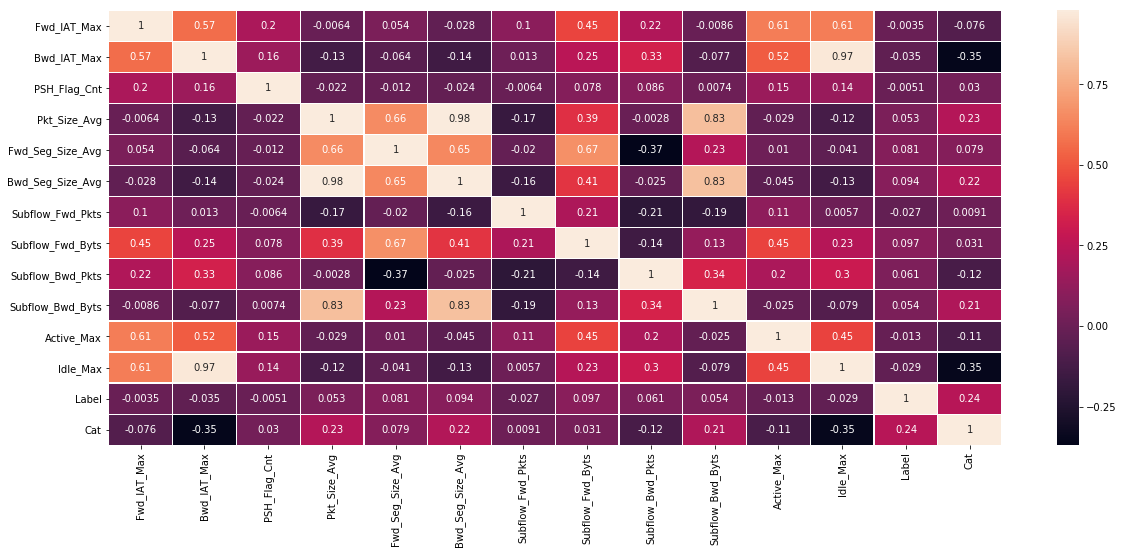

In [82]:
#Plotting correlation to identify features strongly correlated with Label column
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.37,vmax=0.98,annot=True,linewidth=0.2)

In [83]:
#Dropping columns with least correlation with label column
#Cat column also dropped to keep label column as the target
data1=data.drop(['Cat','Pkt_Size_Avg','Subflow_Bwd_Pkts'],axis=1)
data1.head()

,Fwd_IAT_Max,Bwd_IAT_Max,PSH_Flag_Cnt,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Active_Max,Idle_Max,Label
0,0,0,0,982.0,1430.000000,1,982,1430,0,75,0
1,0,5310,0,0.0,0.000000,1,0,0,0,4254,0
2,0,71,0,0.0,935.333333,0,0,2806,0,71,0
3,0,151,0,0.0,1388.000000,0,0,2776,0,151,0
4,76,0,0,443.0,420.000000,2,886,420,0,77,0


In [84]:
data1.dtypes

Fwd_IAT_Max           int64
Bwd_IAT_Max           int64
PSH_Flag_Cnt          int64
Fwd_Seg_Size_Avg    float64
Bwd_Seg_Size_Avg    float64
Subflow_Fwd_Pkts      int64
Subflow_Fwd_Byts      int64
Subflow_Bwd_Byts      int64
Active_Max            int64
Idle_Max              int64
Label                 int32
dtype: object

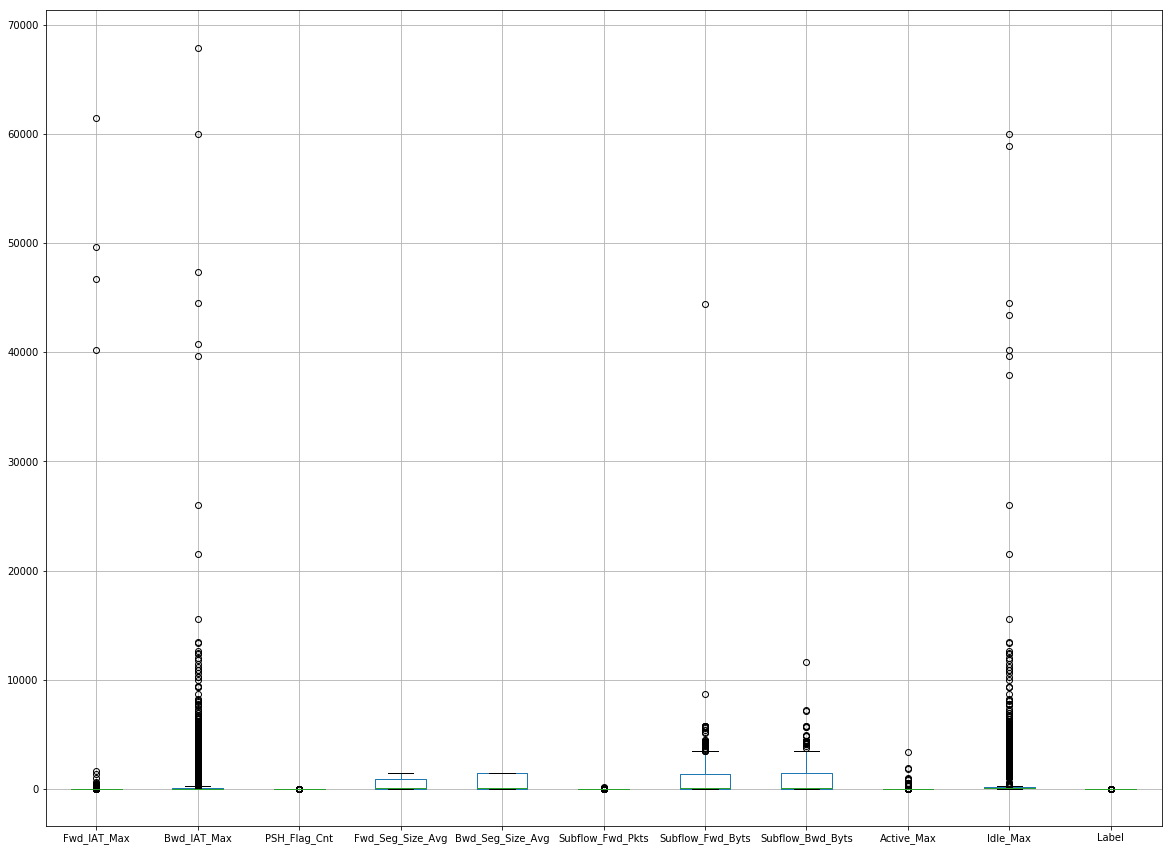

In [85]:
#Finding outliers
graph=data1.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()



In [86]:
#IQR calculation
Q1=data1.quantile(.25)
Q3=data1.quantile(.75)
IQR=Q3-Q1
print(((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).sum())


Fwd_IAT_Max         623
Bwd_IAT_Max         341
PSH_Flag_Cnt         59
Fwd_Seg_Size_Avg      0
Bwd_Seg_Size_Avg      0
Subflow_Fwd_Pkts    135
Subflow_Fwd_Byts     75
Subflow_Bwd_Byts     86
Active_Max          110
Idle_Max            383
Label               178
dtype: int64


In [87]:
for i in ['Fwd_IAT_Max','Bwd_IAT_Max','PSH_Flag_Cnt','Subflow_Fwd_Pkts','Subflow_Fwd_Byts','Subflow_Bwd_Byts','Active_Max','Idle_Max','Label']:
         Q1=np.percentile(data1[i],25,interpolation='midpoint')
         Q2=np.percentile(data1[i],50,interpolation='midpoint')
         Q3=np.percentile(data1[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
         IQR=Q3-Q1
         ll=Q1-1.5*IQR
         ul=Q3+1.5*IQR

         #Identifying outlier values
         outliers=[]
         for x in data1['Fwd_IAT_Max']:
             if (x>ul)or(x<ll):
               outliers.append(x)
         ind=data1['Fwd_IAT_Max']>ul
         i=data1.loc[ind].index
         data1.drop(i,inplace=True)
 

0.0 0.0 6.0
0.0 0.0 119.0
0.0 0.0 0.0
0.0 1.0 1.0
0.0 0.0 646.0
0.0 1388.0 1448.0
0.0 0.0 0.0
76.0 118.0 177.5
0.0 0.0 0.0


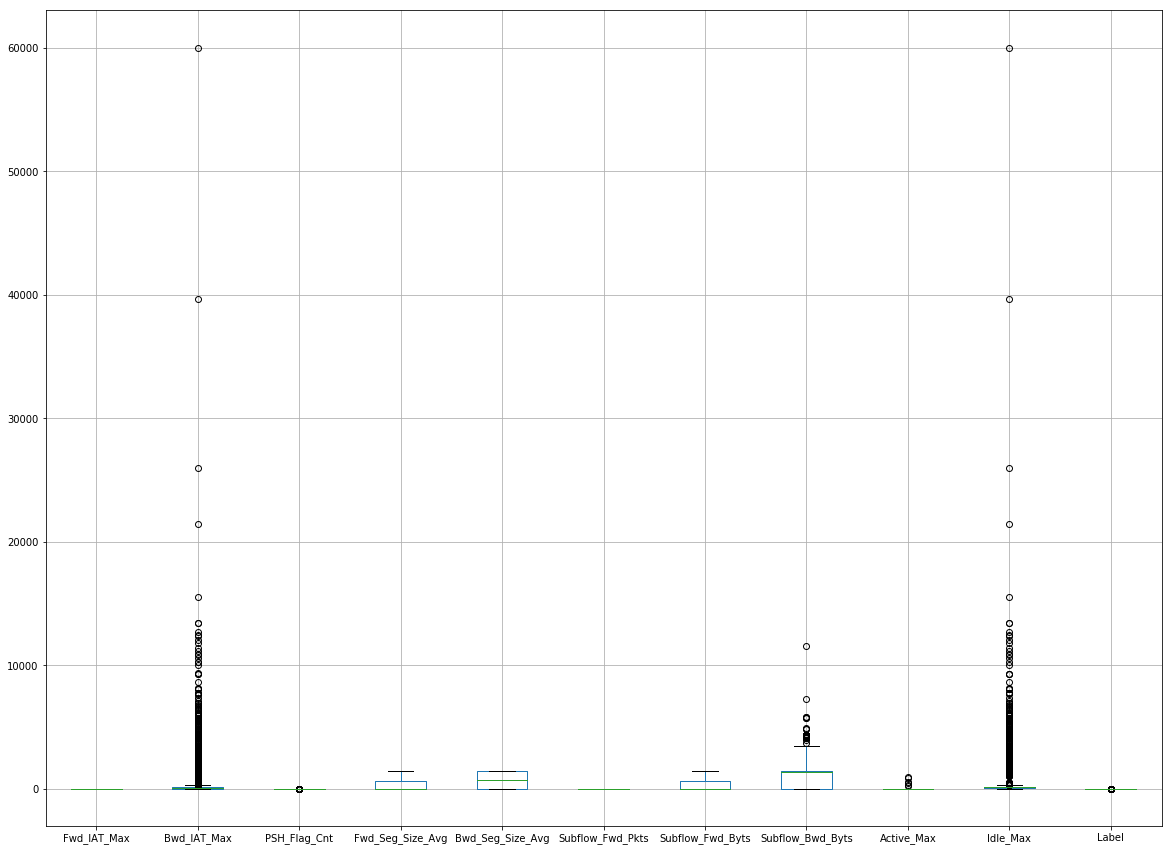

In [88]:
#Checking outliers
graph=data1.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

# Splitting the data

In [89]:
x=data1.drop('Label',axis=1)#features
y=data1['Label']#Target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# kNN classifier model

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [91]:
acc_values

[0.9714285714285714,
 0.9714285714285714,
 0.969047619047619,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9642857142857143,
 0.9642857142857143,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619]

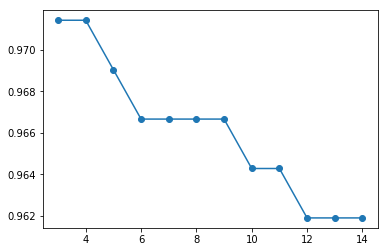

In [92]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [94]:
acc_values

[0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714]

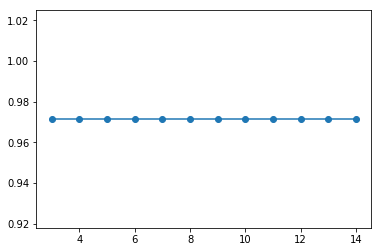

In [95]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [96]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9714285714285714
Precision is 0.9852216748768473
Recall is 0.7692307692307692
F1 score is 0.8425


In [97]:
confusion_matrix(y_test,y_pred)

array([[394,   0],
       [ 12,  14]], dtype=int64)

In [98]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [100]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9476190476190476
Precision is 0.8004926108374384
Recall is 0.6667317454119485
F1 score is 0.7112499999999999


In [101]:
confusion_matrix(y_test,y_pred)

array([[389,   5],
       [ 17,   9]], dtype=int64)

# Logistic regression model

In [102]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [103]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9380952380952381
Precision is 0.46904761904761905
Recall is 0.5
F1 score is 0.48402948402948404


In [104]:
confusion_matrix(y_test,y_pred)

array([[394,   0],
       [ 26,   0]], dtype=int64)

# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
y_pred = dt_model.predict(x_test)

print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9261904761904762
Precision is 0.6889937384249052
Recall is 0.709195626708317
F1 score is 0.698436595251882


In [107]:
confusion_matrix(y_test,y_pred)

array([[377,  17],
       [ 14,  12]], dtype=int64)

# SVM

In [109]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
y_pred = svm_linear.predict(x_test)

print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9380952380952381
Precision is 0.46904761904761905
Recall is 0.5
F1 score is 0.48402948402948404


In [111]:
confusion_matrix(y_test,y_pred)

array([[394,   0],
       [ 26,   0]], dtype=int64)

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
y_pred=rf.predict(x_test)

print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9404761904761905
Precision is 0.7590799031476998
Recall is 0.5731159703240922
F1 score is 0.6057226540497915


In [114]:
confusion_matrix(y_test,y_pred)

array([[391,   3],
       [ 22,   4]], dtype=int64)

In [115]:
#Feature Importance

In [116]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending = False)*100

Idle_Max            49.194857
Bwd_IAT_Max         17.551799
Subflow_Bwd_Byts    13.919198
Bwd_Seg_Size_Avg     9.116192
Subflow_Fwd_Byts     5.623940
Fwd_Seg_Size_Avg     3.594742
Subflow_Fwd_Pkts     0.717406
PSH_Flag_Cnt         0.281867
Active_Max           0.000000
Fwd_IAT_Max          0.000000
dtype: float64

In [117]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
rft= RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion="entropy")
rft.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [119]:
y_pred=rft.predict(x_test)

print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9595238095238096
Precision is 0.9793187347931873
Recall is 0.6730769230769231
F1 score is 0.746583850931677


In [120]:
confusion_matrix(y_test,y_pred)

array([[394,   0],
       [ 17,   9]], dtype=int64)

# Naives Bayes

In [121]:
#Feature scaling
x_train = pd.DataFrame(x_train, columns = x.columns)
cols = x_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=[cols])        
x_test = pd.DataFrame(x_test, columns=[cols])  

In [122]:
#Model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9381


In [125]:
#compare the train-set and test-set accuracy to check for overfitting.
y_pred_train = gnb.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[394   0]
 [ 26   0]]

True Positives(TP) =  394

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  26


In [127]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [128]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9381
Classification error : 0.0619


Findings:
    i) The objective was to identify anomaly in a IOT sensor network---ie target is anomaly/normal
    Classification algorithms used
    i)KNN-accuracy without scaling --97%  KNN with standard scaling--94%
    ii)Logistic regression model--accuracy=94%
    iii)Decision Tree Classifier-accuracy=92%
    iv)SVM--accuracy=94%
    v)Random forest---accuracy-96%
    vi) Naive Bayes---accuracy-94%
Hence can be concluded that KNN without scaling is the best model to suit our purpose.